In [41]:
#Project 01:
#Load the Dataset
import pandas as pd

url = "https://raw.githubusercontent.com/PulockDas/pd-12-resources/refs/heads/master/titanic.csv"
df = pd.read_csv(url)
print(df.head())


   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


In [42]:
#Find the missing values
missing_values = df.isnull().sum()
print(missing_values[missing_values > 0])


Age         177
Cabin       687
Embarked      2
dtype: int64


In [43]:
#Fill Missing values
df['Age'].fillna(df['Age'].mean(), inplace=True)
df['Cabin'].fillna('Unknown', inplace=True)


<ipython-input-43-584f105db79d>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].mean(), inplace=True)
<ipython-input-43-584f105db79d>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try usin

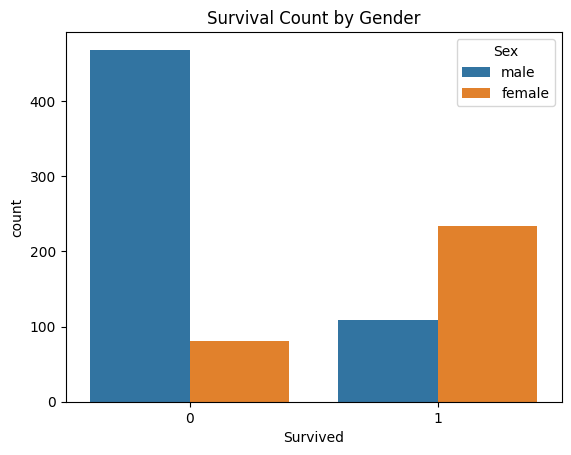

In [44]:
#Plot Survived vs. Dead with Male/Female distribution
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='Survived', hue='Sex', data=df)
plt.title("Survival Count by Gender")
plt.show()


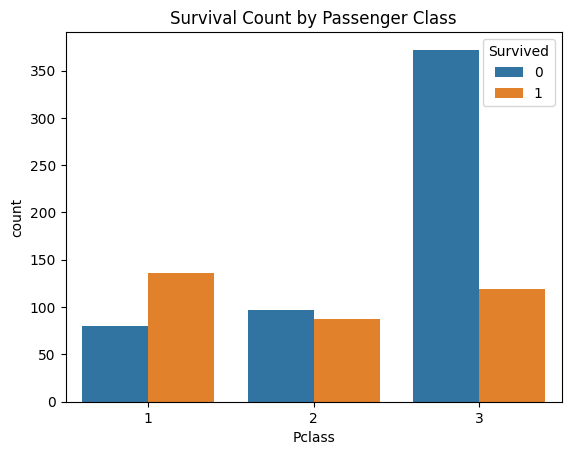

In [45]:
#Plot Survived/Dead against Passenger Class
sns.countplot(x='Pclass', hue='Survived', data=df)
plt.title("Survival Count by Passenger Class")
plt.show()


In [46]:
#Create Ageclass
def classify_age(age):
    if age <= 16:
        return 0
    elif age <= 26:
        return 1
    elif age <= 36:
        return 2
    elif age <= 62:
        return 3
    else:
        return 4

print(df.columns)
df['AgeClass'] = df['Age'].apply(classify_age)


Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


In [47]:
#Drop Age Column
df.drop(columns=['Age'], inplace=True)

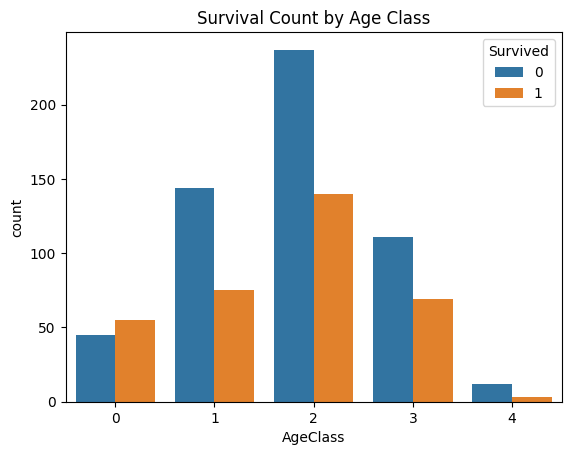

In [48]:
#Plot Survived/Dead against AgeClass
sns.countplot(x='AgeClass', hue='Survived', data=df)
plt.title("Survival Count by Age Class")
plt.show()


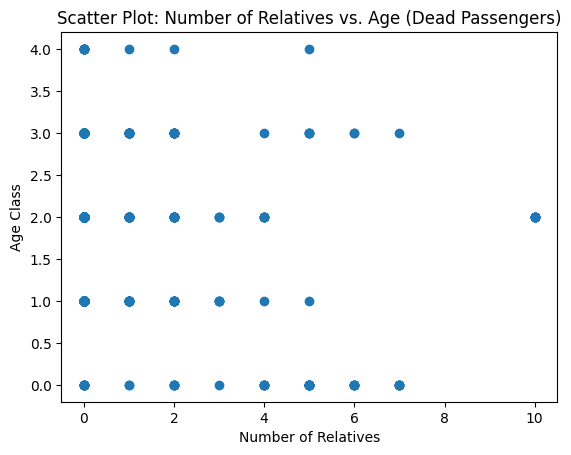

In [50]:
#Assignment 5
df['Number of Relatives'] = df['SibSp'] + df['Parch']

dead_passengers = df[df['Survived'] == 0]
plt.scatter(dead_passengers['Number of Relatives'], dead_passengers['AgeClass'])
plt.xlabel("Number of Relatives")
plt.ylabel("Age Class")
plt.title("Scatter Plot: Number of Relatives vs. Age (Dead Passengers)")
plt.show()


In [51]:
#Project 02:
#Create CSV files for term-test results

import numpy as np

students = ['Student ' + str(i) for i in range(1, 51)]
reg_numbers = [1000 + i for i in range(50)]
tt1_marks = np.random.randint(30, 100, 50)
tt2_marks = np.random.randint(30, 100, 50)

df1 = pd.DataFrame({'Registration Number': reg_numbers, 'Name': students, 'TT-1 Marks': tt1_marks})
df2 = pd.DataFrame({'Registration Number': reg_numbers, 'Name': students, 'TT-2 Marks': tt2_marks})

df1.to_csv('term-test-1-result.csv', index=False)
df2.to_csv('term-test-2-result.csv', index=False)


In [52]:
#Load both files in Pandas
df1 = pd.read_csv('term-test-1-result.csv')
df2 = pd.read_csv('term-test-2-result.csv')


In [53]:
#Merge both databases
merged_df = pd.merge(df1, df2, on=['Registration Number', 'Name'])
print(merged_df.head())


   Registration Number       Name  TT-1 Marks  TT-2 Marks
0                 1000  Student 1          79          79
1                 1001  Student 2          73          86
2                 1002  Student 3          77          30
3                 1003  Student 4          77          92
4                 1004  Student 5          94          52


In [54]:
#Create Column
merged_df['Best Marks'] = merged_df[['TT-1 Marks', 'TT-2 Marks']].max(axis=1)
merged_df['Average Marks'] = merged_df[['TT-1 Marks', 'TT-2 Marks']].mean(axis=1)


In [55]:
#Drop TT-1 Marks and TT-2 Marks
merged_df.drop(columns=['TT-1 Marks', 'TT-2 Marks'], inplace=True)


In [56]:
#Save to a new CSV file
merged_df.to_csv('final-term-test-result.csv', index=False)


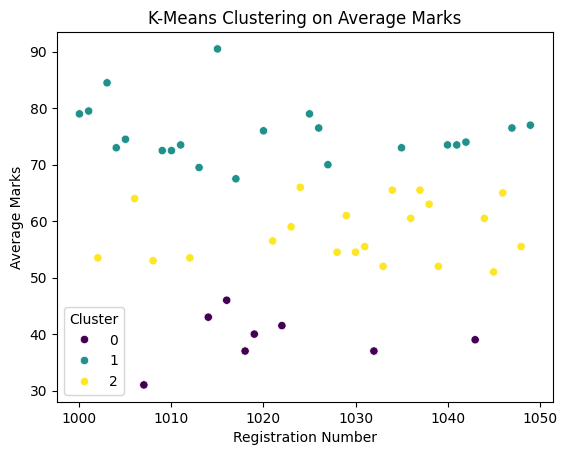

In [57]:
#K-Means Clustering on Average Marks
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, random_state=42)
merged_df['Cluster'] = kmeans.fit_predict(merged_df[['Average Marks']])

sns.scatterplot(x=merged_df['Registration Number'], y=merged_df['Average Marks'], hue=merged_df['Cluster'], palette='viridis')
plt.title("K-Means Clustering on Average Marks")
plt.show()
